In [93]:
import numpy as np
fruits = np.load('D:/pandas_main/part7/data/fruits_300.npy')
fruits.shape # 300개의 이미지 중 100px X 100px 단위로 되어 있음 


(300, 100, 100)

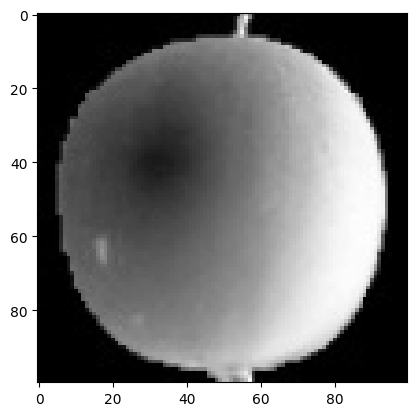

In [94]:
import matplotlib.pyplot as plt
plt.imshow(fruits[0],cmap='gray')
plt.show()

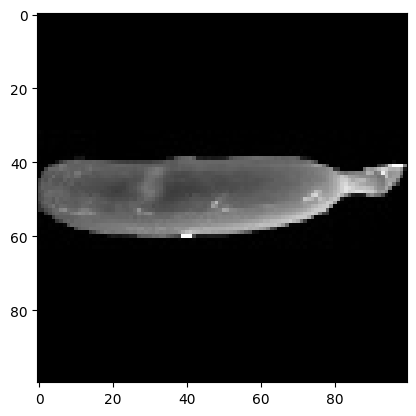

In [95]:
plt.imshow(fruits[200],cmap='gray')
plt.show()

In [96]:
from sklearn.cluster import KMeans  # sklearn 계열의 학습데이터는 2차원 ndim 2 

km = KMeans(n_clusters=3 , random_state=42)
fruits.ndim
f2d = fruits.reshape(300,-1) # ???
km.fit(f2d)



,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [97]:
km.cluster_centers_.shape

(3, 10000)

In [98]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [99]:
km.cluster_centers_.shape  # .shape 중심좌표가 총 3개라는 뜻.

(3, 10000)

In [100]:
km.labels_[:10]

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

In [101]:
temp = np.array([ [1,2],[3,4] ])
temp.shape

(2, 2)

In [102]:
temp.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

In [103]:
temp.reshape(-1,1) #??

array([[1],
       [2],
       [3],
       [4]])

In [104]:
temp.reshape(1,-1) #??

array([[1, 2, 3, 4]])

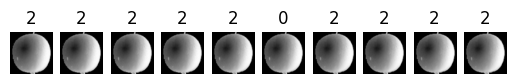

In [105]:
import matplotlib.pyplot as plt
# plt.subplot(1,10,1) # subplots와 다른점?

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(fruits[0],cmap='gray')
    plt.title(km.labels_[i])
plt.show()

In [106]:
fruits[km.labels_==2].shape # 사과의 이미지로 되어 있는 튜플이 90개라는거

(90, 100, 100)

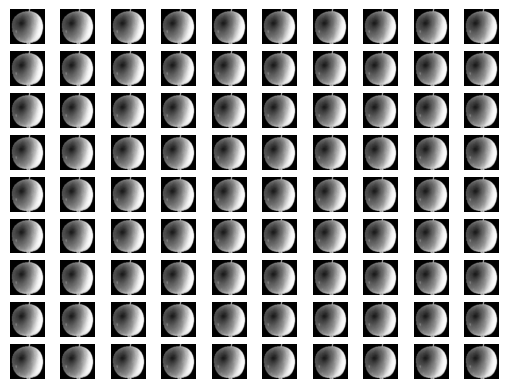

In [107]:

for i,apple in enumerate(fruits[km.labels_==2]):
    plt.subplot(9,10,i+1) # 2가 90개가 있으니까 모든 이미지를 전부 배치 가능 → 에러 없이 동작 
    plt.axis('off')
    plt.imshow(fruits[0],cmap='gray')


In [108]:
# 최적의 K 값 찾기 엘보우
# 클러스터의 응집도 측정하는 성능지표  /  각 데이터 포인터가 자신이 속한 클러스터의 중심과 얼마나 가까운지를 나타내는 총 거리 합
# 클러스터가 많을수록 줄어드는 특징이 있음
# 그래프에서 K가 증가하면서 inertia_  감소폭이 급격히 줄어드는 지점이 적잘한 K
# 거리기반 / 평균 / 이상치에 민감함  ( 이상치를 제거해주는게 제일 좋음 )
# 스케일링 필수!

km.inertia_

5075273831.931916

C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\playdata\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarni

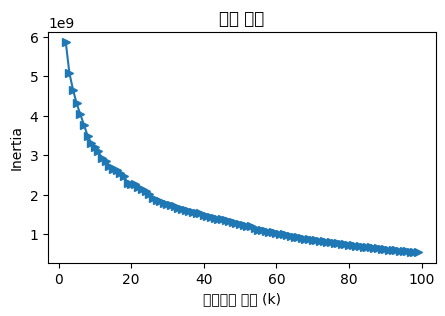

In [115]:
import matplotlib.pyplot as plt

inertia = []
plt.figure(figsize=(5,3))
for k in range(2,100):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(f2d)
    inertia.append(km.inertia_)
plt.plot(range(2,100),inertia , marker='>')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('Inertia')
plt.title('엘보 기법')
plt.show()

